In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('Phishing_Email.csv', encoding='ISO-8859-1')
df = df[['label', 'text']]

label_counts = df['label'].value_counts()

In [3]:
# 2. Find Missing Values
missing_text_count = df['text'].isnull().sum()
print(f"Number of missing values in 'text' column: {missing_text_count}")

Number of missing values in 'text' column: 16


In [4]:
# 3. Treat Missing Values
if missing_text_count > 0:
    df['text'].fillna('', inplace=True)
    print("Missing values in 'text' column filled with empty strings.")
else:
    print("No missing values found in 'text' column.")

Missing values in 'text' column filled with empty strings.


C:\Users\HP\AppData\Local\Temp\ipykernel_20428\1767109224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('', inplace=True)


In [5]:
# 4. Create 'label_num'
unique_labels = df['label'].unique()
label_map = {label: i for i, label in enumerate(unique_labels)}
df['label_num'] = df['label'].map(label_map)

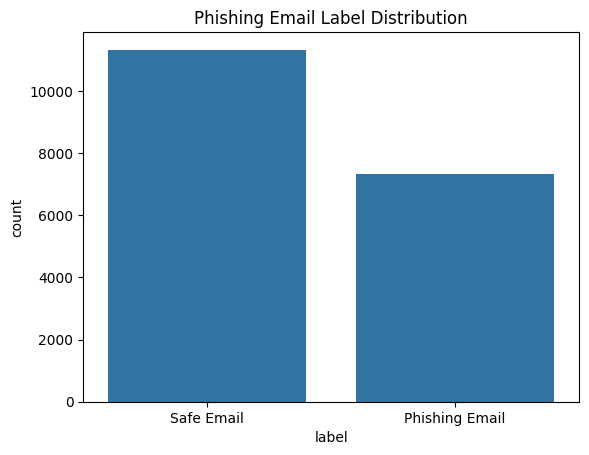

In [6]:
# Label distribution
sns.countplot(x='label', data=df)
plt.title('Phishing Email Label Distribution')
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.3, random_state=42)


In [8]:
# Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

In [9]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [10]:
# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [11]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [12]:
# Create table
table = [
    ["Model", "Train Accuracy", "Test Accuracy"],
    ["MultinomialNB", train_accuracy, test_accuracy],
]
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+---------------+------------------+-----------------+
| Model         |   Train Accuracy |   Test Accuracy |
+===============+==================+=================+
| MultinomialNB |         0.948142 |        0.915996 |
+---------------+------------------+-----------------+


Accuracy: 0.9160


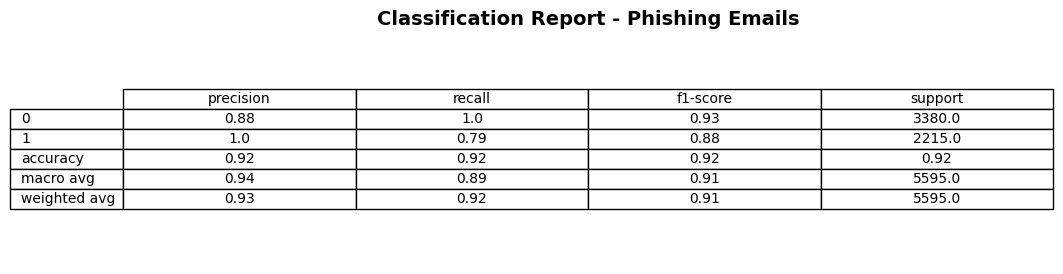

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Visualize as table
plt.figure(figsize=(10, len(df_report)*0.6))
plt.axis('off')
plt.title("Classification Report - Phishing Emails", fontsize=14, fontweight='bold')
table = plt.table(cellText=df_report.round(2).values,
                  colLabels=df_report.columns,
                  rowLabels=df_report.index,
                  loc='center',
                  cellLoc='center',
                  colLoc='center')
table.scale(1.2, 1.2)
plt.show()

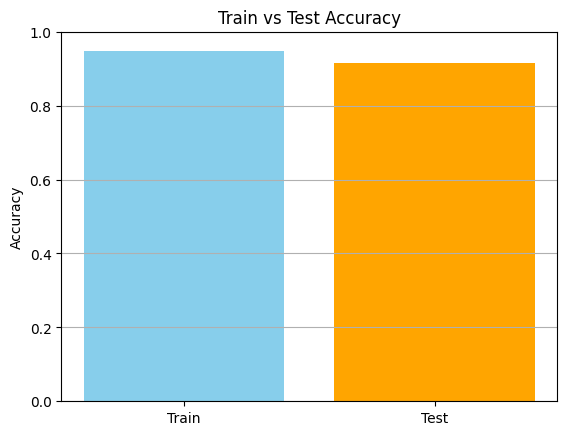

In [14]:
# Compare train vs test accuracy
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['skyblue', 'orange'])
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

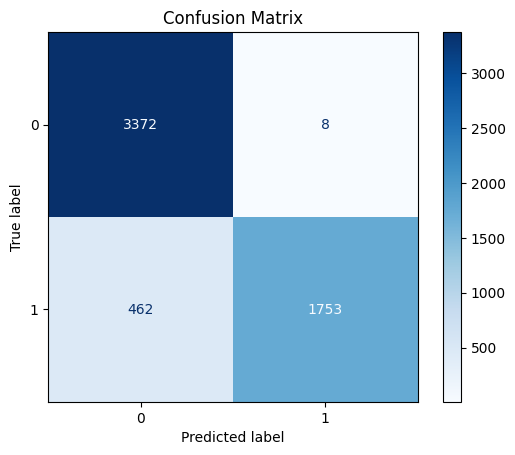

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# Clean dataset
df = df[['text', 'label']].dropna()
X = df["text"]
y = df["label"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline and train
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

# Save the entire pipeline
joblib.dump(pipeline, "phishing_email_model.pkl")
print("✅ Email pipeline model saved.")


✅ Email pipeline model saved.
